In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats

import acquired
import prepare



In [36]:
df = acquired.get_iris_data()
df.head()

this file exists, reading csv


,Unnamed: 0,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,1,2,4.9,3.0,1.4,0.2,setosa
2,2,1,3,4.7,3.2,1.3,0.2,setosa
3,3,1,4,4.6,3.1,1.5,0.2,setosa
4,4,1,5,5.0,3.6,1.4,0.2,setosa


In [40]:
# show collumns and rows
df.shape

(150, 7)

In [4]:
#show collumns and the amount of different data
df.nunique()

Unnamed: 0        150
species_id          3
measurement_id    150
sepal_length       35
sepal_width        23
petal_length       43
petal_width        22
species_name        3
dtype: int64

In [85]:
#creating categorical and numerical variables
cat_col = []
con_col = []

#looping through all my columns
for col in df.columns:
    
    #finding all my string columns
    print(col)
    print(df[col].dtype)
    if df[col].dtype == 'object':
        print('this is a string variable')
        cat_col.append(col)
    else:
        print('this is a number')
        
        #check for how many unique values
        print(df[col].nunique())
        if df[col].nunique() < 10:
            print('treat as categorical variable')
            cat_col.append(col)
        else: 
            #if it has more than 10 unique values, append to continous column variable
            con_col.append(col)
    print()

sepal_length
float64
this is a number
35

sepal_width
float64
this is a number
23

petal_length
float64
this is a number
43

petal_width
float64
this is a number
22

species
object
this is a string variable


In [86]:
cat_col

['species']

In [87]:
con_col

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

species_id
species_id
1    50
2    50
3    50
Name: count, dtype: int64
species_id
1    0.333333
2    0.333333
3    0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


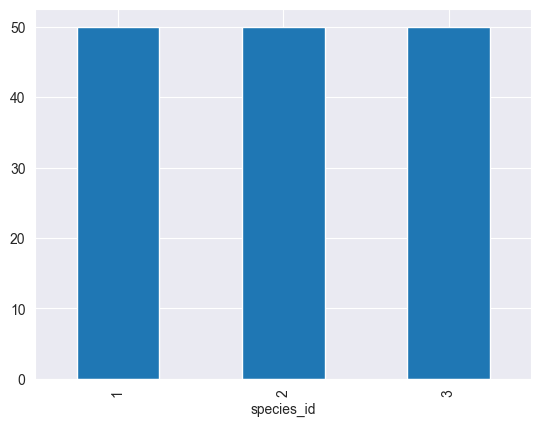


species_name
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
species_name
setosa        0.333333
versicolor    0.333333
virginica     0.333333
Name: proportion, dtype: float64
Axes(0.125,0.11;0.775x0.77)


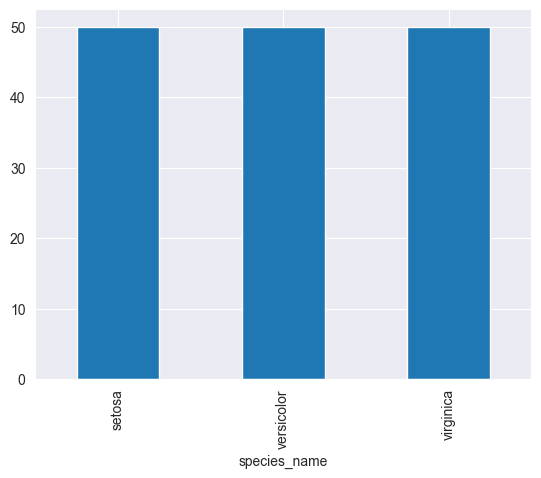

In [41]:
#printing cat_col info 
for col in cat_col:
    #name of column
    print(col)
    #value counts
    print(df[col].value_counts())
    #percentage for each value
    print(df[col].value_counts(normalize=True))
    #plot bar for each column
    print(df[col].value_counts().sort_index().plot.bar())
    plt.show()
    #space
    print()

measurement_id
(0.85, 30.8]      30
(30.8, 60.6]      30
(60.6, 90.4]      30
(90.4, 120.2]     30
(120.2, 150.0]    30
Name: count, dtype: int64


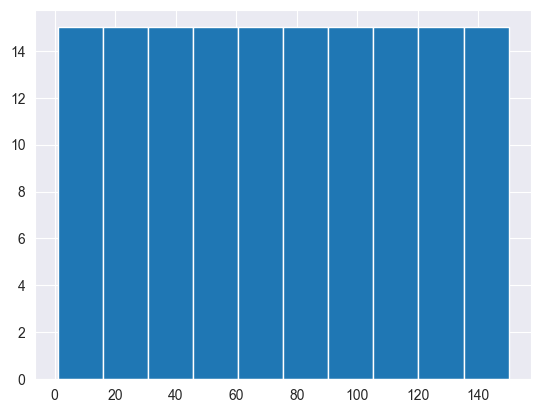

sepal_length
(4.295, 5.02]    32
(5.02, 5.74]     41
(5.74, 6.46]     42
(6.46, 7.18]     24
(7.18, 7.9]      11
Name: count, dtype: int64


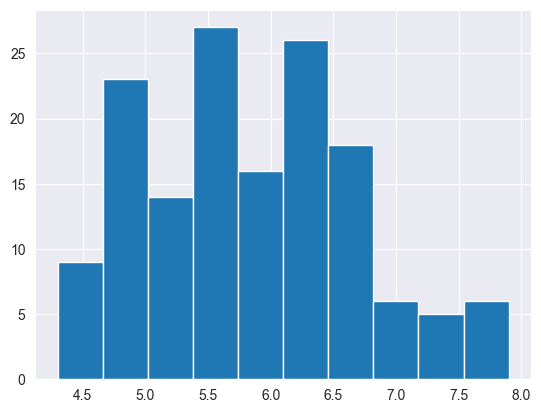

sepal_width
(1.997, 2.48]    11
(2.48, 2.96]     46
(2.96, 3.44]     68
(3.44, 3.92]     21
(3.92, 4.4]       4
Name: count, dtype: int64


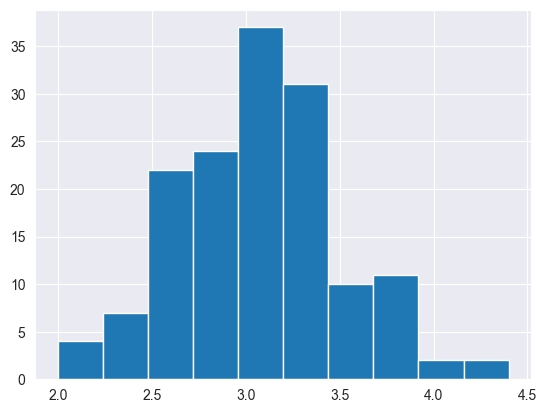

petal_length
(0.993, 2.18]    50
(2.18, 3.36]      3
(3.36, 4.54]     34
(4.54, 5.72]     47
(5.72, 6.9]      16
Name: count, dtype: int64


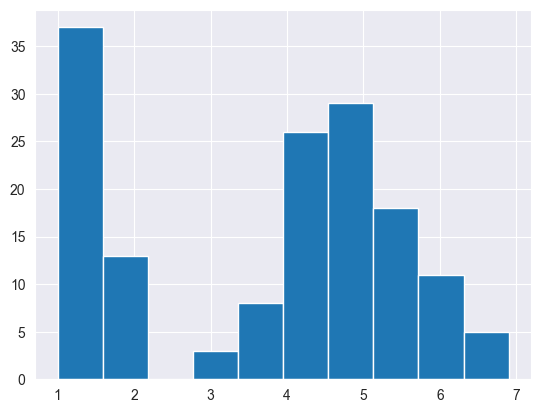

petal_width
(0.0966, 0.58]    49
(0.58, 1.06]       8
(1.06, 1.54]      41
(1.54, 2.02]      29
(2.02, 2.5]       23
Name: count, dtype: int64


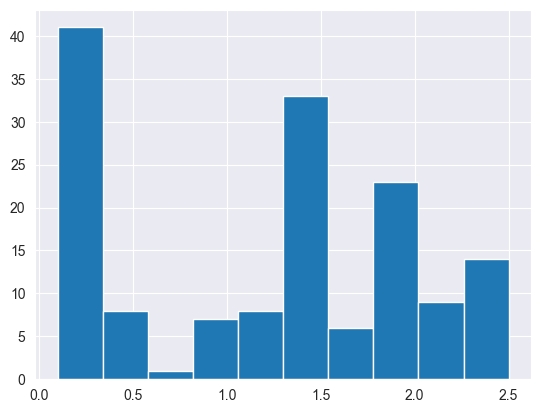

In [42]:
#now plotting continues values
for col in con_col:
    print(col)
    print(df[col].value_counts(bins=5).sort_index())
    df[col].hist()
    plt.show()

In [43]:
df = prepare.prep_iris(df)

In [11]:
df.head()

,Unnamed: 0,sepal_length,sepal_width,petal_length,petal_width,species
0,0,5.1,3.5,1.4,0.2,setosa
1,1,4.9,3.0,1.4,0.2,setosa
2,2,4.7,3.2,1.3,0.2,setosa
3,3,4.6,3.1,1.5,0.2,setosa
4,4,5.0,3.6,1.4,0.2,setosa


In [37]:
df = df.drop('Unnamed: 0', axis=1)

In [38]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


removed unnecesary columns and info

In [44]:
train, validate, test = prepare.splitting_data(df, 'species')

In [45]:
train.shape

(90, 5)

In [46]:
validate.shape

(30, 5)

In [47]:
test.shape

(30, 5)

In [48]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


Univariate Stats

    For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).
    
    For each species (categorical variable): create a frequency table and a bar plot of those frequencies.
    
    Document takeaways & any actions`.`

Text(0.5, 1.0, 'boxplot')

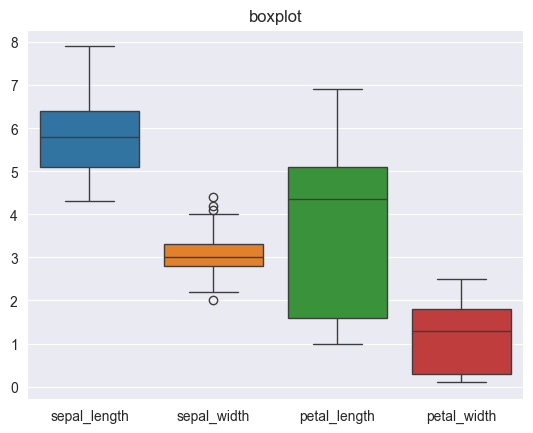

In [98]:
sns.boxplot(data= df[con_col])
plt.title(f'boxplot')


length has a wider distribution between species


<function matplotlib.pyplot.show(close=None, block=None)>

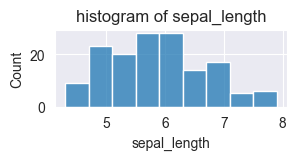

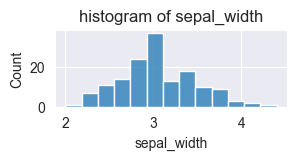

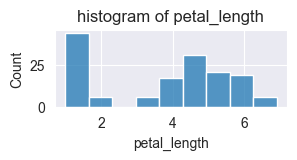

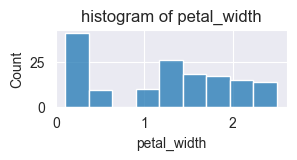

In [102]:
for col in con_col:
    plt.figure(figsize=(3,1))
    sns.histplot(data= df[con_col], x=col)
    plt.title(f'histogram of {col}')

plt.show

most of the data for pedals is on the low end, and their is a visible gap in the data
for sepal it is a symmetrical distribution ( makes it more predicable)

In [103]:
cat_col

['species']

In [111]:
df[cat_col].value_counts()

species   
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

TypeError: unhashable type: 'numpy.ndarray'

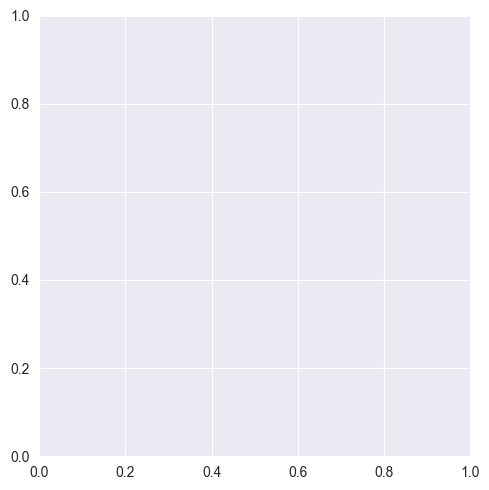

In [123]:
sns.relplot(data=df[cat_col].value_counts())

In [143]:
train.head()

,sepal_length,sepal_width,petal_length,petal_width,species
24,4.8,3.4,1.9,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
88,5.6,3.0,4.1,1.3,versicolor
123,6.3,2.7,4.9,1.8,virginica
31,5.4,3.4,1.5,0.4,setosa


Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).

m

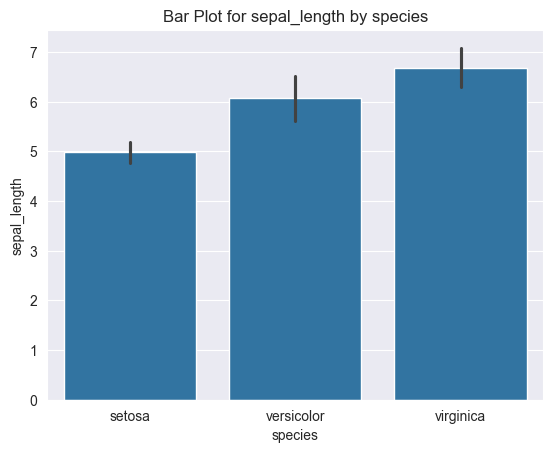

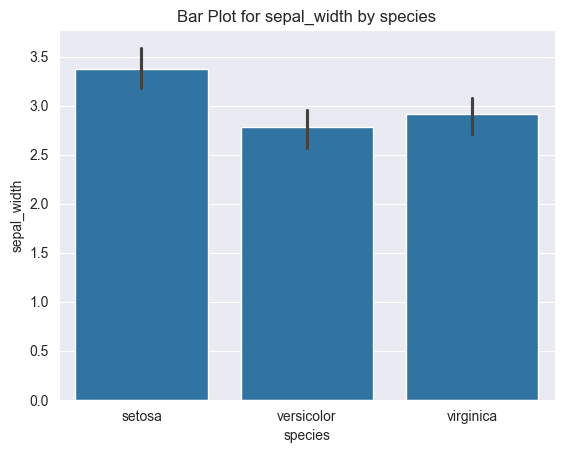

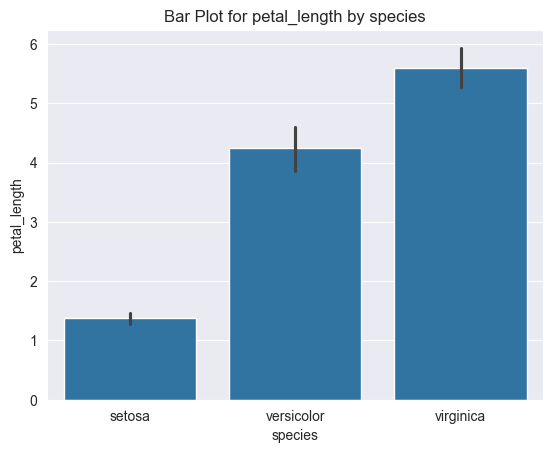

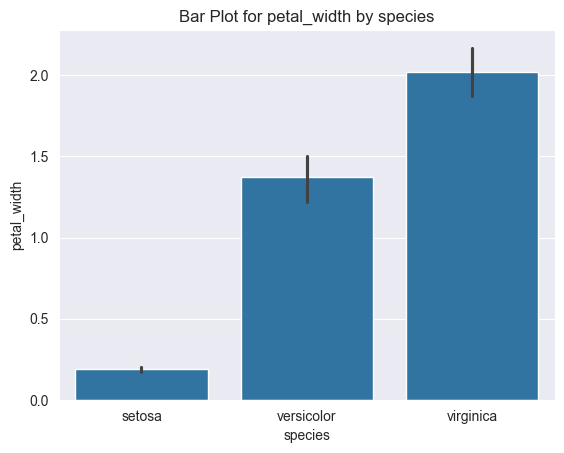

In [144]:
for col in con_col:
    sns.barplot(data=test, y=col, x='species')
    plt.title(f'Bar Plot for {col} by species')
    plt.show()

For each measurement type, compute the descriptive statistics for each species.

In [223]:
grouped_df = train.groupby('species').describe()
grouped_df.head()

sepal_length                                                   \
                  count      mean       std  min    25%  50%    75%  max   
species                                                                    
setosa             30.0  4.993333  0.354219  4.3  4.800  5.0  5.175  5.7   
versicolor         30.0  5.843333  0.478996  5.0  5.525  5.7  6.075  7.0   
virginica          30.0  6.506667  0.616404  4.9  6.225  6.4  6.875  7.9   

           sepal_width        ... petal_length      petal_width            \
                 count  mean  ...          75%  max       count      mean   
species                       ...                                           
setosa            30.0  3.39  ...        1.600  1.9        30.0  0.256667   
versicolor        30.0  2.72  ...        4.500  5.1        30.0  1.283333   
virginica         30.0  2.96  ...        5.675  6.9        30.0  2.033333   

                                                  
                 std  min  25%   50%    75%  max  
species                                           
setosa      0.100630  0.1  0.2  0.20  0.300  0.5  
versicolor  0.170361  1.0  1.2  1.30  1.375  1.6  
virginica   0.277095  1.4  1.8  2.05  2.300  2.5  

[3 rows x 32 columns]

For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. Do the same for the other measurement types.

In [226]:
# creating seperate dataframe for each species
virginica = train[train['species'] == 'virginica']
versicolor = train[train['species'] == 'versicolor']

In [227]:
virginica.head()

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,virginica
123,6.3,2.7,4.9,1.8,virginica
137,6.4,3.1,5.5,1.8,virginica
133,6.3,2.8,5.1,1.5,virginica
103,6.3,2.9,5.6,1.8,virginica


In [228]:
virg_mean = virginica.petal_length.mean()
virg_mean

5.4799999999999995

In [229]:
versicolor.head()

,sepal_length,sepal_width,petal_length,petal_width,species
88,5.6,3.0,4.1,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
97,6.2,2.9,4.3,1.3,versicolor
89,5.5,2.5,4.0,1.3,versicolor
50,7.0,3.2,4.7,1.4,versicolor


In [230]:
versi_mean = versicolor.petal_length.mean()
versi_mean

4.196666666666666

-111$H_0$: there is NO difference between means for each categorical columns between virginica and versicolor
$H_a$: the IS difference between means for each categorical columns between virginica and versicolor


In [231]:
alpha = .05

In [232]:
#in order to visualize the 2 data side by side i will join them in one df
combined_df = pd.concat([versicolor, virginica])

sepal_length


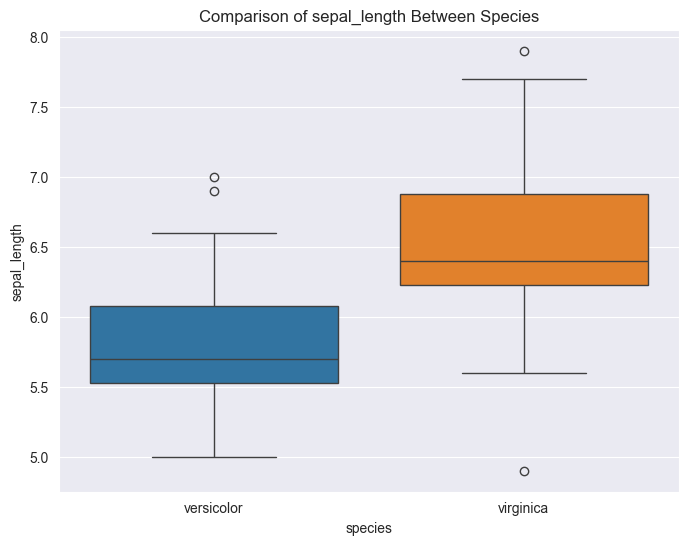

sepal_width


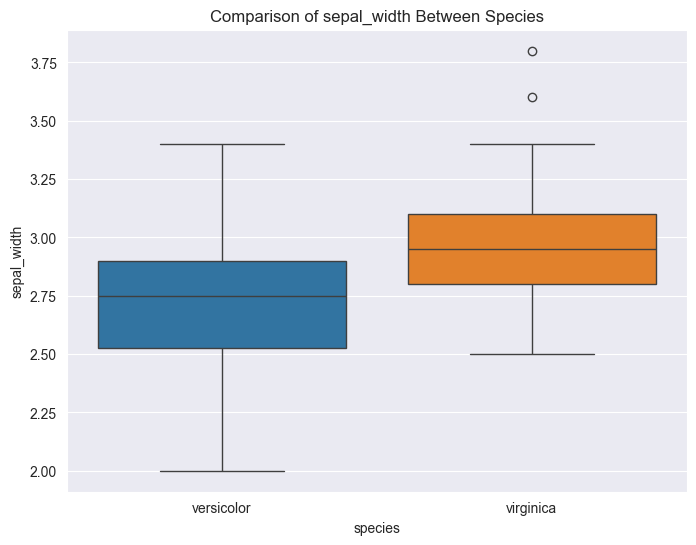

petal_length


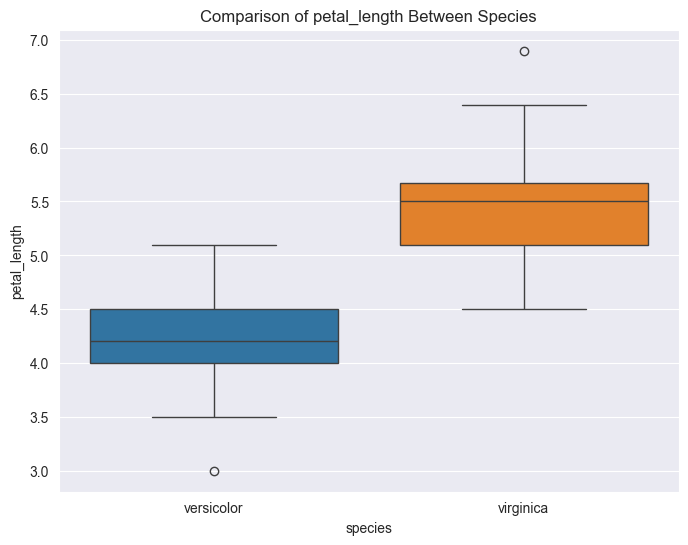

petal_width


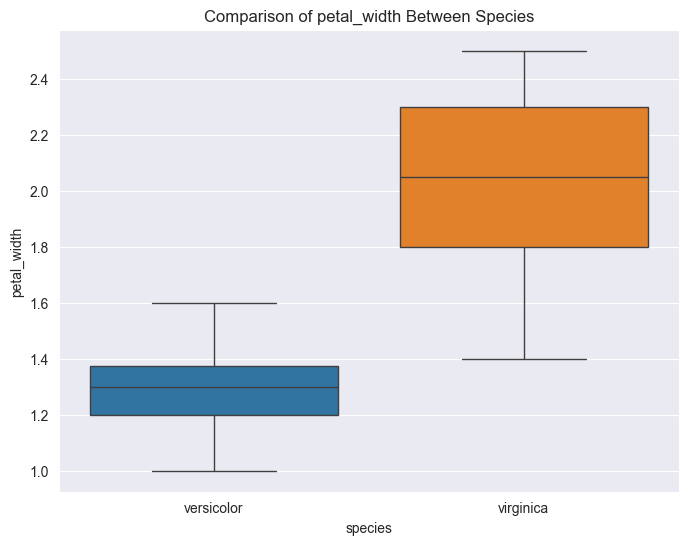

In [244]:
for col in con_col:
    print(col)
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=col, x='species', data=combined_df, orient='v', hue='species')
    plt.title(f'Comparison of {col} Between Species')
    plt.show()

In [234]:
#running mann whitney test for each column between both species
# empty dictionary to add variables created
p_values = {}

for x in con_col:
    # getting the p values for each col
    stat, p = stats.mannwhitneyu(virginica[x], versicolor[x])
#     adding keys into dict and pairs are the values given from loops
    p_values[x] = p
    

In [235]:
p_values

{'sepal_length': 2.0617069812153646e-05,
 'sepal_width': 0.00844990346320156,
 'petal_length': 1.368106833576727e-10,
 'petal_width': 7.12423012584302e-11}

In [237]:
# loop to check for each alpha
for k, v in p_values.items():
    if v < alpha:
        print(f'reject the null hypothesis for {k}')
        print()
    else:
        print(f'fail to reject the null hypothesis for {k}')
        print()

reject the null hypothesis for sepal_length

reject the null hypothesis for sepal_width

reject the null hypothesis for petal_length

reject the null hypothesis for petal_width
